<a href="https://colab.research.google.com/github/tarunteju2/German-Banking/blob/main/MGMT_635_Group_Project_Assn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libararies

In [ ]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import tree
import matplotlib.pylab as plt
import graphviz

%matplotlib inline
%matplotlib inline


Some preliminary code has been provided. Please insert the code per instruction in the comments to complete the code.

# Load data

Download the german-credit-card.csv file from the project handout and load it here.  The following is to test you on


1.   Load your inputdata into Python notebook
2.   You are using Colab Cloud, you need to work with a virtual computer in Cloud.  You need to upload the data into your virtual computer.

You can do Internet search to figure out how to perform that.  I also provide you a reference implementation here (https://colab.research.google.com/drive/1p64pBc-GnvoNlm6ILIbAG8LegxtWNzH1: Mailing Data Preprocessing.ipynb)



In [ ]:
# Load the data into a pandas DataFrame
credit_df = pd.read_csv('/content/german-credit-card.csv')

# Show data information

In [ ]:
#look at the first five rows of the data
credit_df.head()

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
credit_df.target_names= ['Good', 'Bad']
print(credit_df.target_names)

['Good', 'Bad']


<ipython-input-119-2dde0a673ff8>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  credit_df.target_names= ['Good', 'Bad']


In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   amount             1000 non-null   int64 
 5   saving_acc         1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residing_since     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  inst_plans         1000 non-null   object
 14  housing            1000 non-null   object
 15  num_credits        1000 non-null   int64 
 16  job                1000 non-null   object
 

## Data preprocessing

### Remove target from model training

Feature 'status' is what the model needs to predict. Remove it  to create the feature array to train the model

In [ ]:
X_features = list( credit_df.columns )
X_features.remove( 'status' )
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'purpose',
 'amount',
 'saving_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'other_debtors',
 'residing_since',
 'property',
 'age',
 'inst_plans',
 'housing',
 'num_credits',
 'job',
 'dependents',
 'telephone',
 'foreign_worker']

## Create dummy variables for categorical values.

In [ ]:
# insert the code to create dummy variable for categorical features. Hint: See MailingData_Preprocessing for example.
credit_df_complete = pd.get_dummies(credit_df[X_features])

In [ ]:
credit_df_complete.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,checkin_acc_A11,checkin_acc_A12,checkin_acc_A13,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
0,6,1169,4,4,67,2,1,1,0,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,0,1,0,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,1,0,0,...,0,1,0,0,1,0,1,0,1,0


In [ ]:
len(credit_df_complete.columns) #print the number of columns

61

## Convert the credit rating (1 = Good, 2 = Bad) to value 0 or 1 for binary prediction labels

In [ ]:
#Change the reponse variable to 0 = Good and 1 = Bad
Y = credit_df.status - 1
X = credit_df_complete

## Split the data for training and testing

In [ ]:
# Insert the code to split the data for training and testing set. Hint: see BreastCancerData_Preprocessing for example
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

## Standardize the data

In [ ]:
# Insert the code to standardize the data. Hint: see BreastCancerData_Preprocessing for example.
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Feature Analysis

In [ ]:
# Compute correlation between features and the target, and sort them by absolute value
correlation_matrix = pd.DataFrame(X, columns=credit_df_complete.columns).corrwith(Y).abs().sort_values(ascending=False)

# Display all correlations sorted by absolute value
pd.set_option('display.max_rows', None)
print(correlation_matrix)

checkin_acc_A14          0.322436
checkin_acc_A11          0.258333
duration                 0.214927
credit_history_A34       0.181713
saving_acc_A61           0.161007
amount                   0.154739
credit_history_A30       0.144767
housing_A152             0.134589
credit_history_A31       0.134448
saving_acc_A65           0.129238
property_A124            0.125750
checkin_acc_A12          0.119581
property_A121            0.119300
inst_plans_A143          0.113285
purpose_A43              0.106922
present_emp_since_A72    0.106397
purpose_A41              0.099791
purpose_A40              0.096900
inst_plans_A141          0.096510
housing_A151             0.092785
age                      0.091127
saving_acc_A64           0.085749
foreign_worker_A201      0.082079
foreign_worker_A202      0.082079
housing_A153             0.081556
personal_status_A93      0.080677
present_emp_since_A74    0.075980
personal_status_A92      0.075493
inst_rate                0.072404
saving_acc_A63

In [ ]:
# Filter features based on correlation score
selected_features = correlation_matrix[correlation_matrix > 0.08].index.tolist()

# Reset display option
pd.reset_option('display.max_rows')

# Print the selected features
print(selected_features)

# Create final training and testing sets with selected features
X_train_final = pd.DataFrame(X_train, columns=credit_df_complete.columns)[selected_features]
X_test_final = pd.DataFrame(X_test, columns=credit_df_complete.columns)[selected_features]

['checkin_acc_A14', 'checkin_acc_A11', 'duration', 'credit_history_A34', 'saving_acc_A61', 'amount', 'credit_history_A30', 'housing_A152', 'credit_history_A31', 'saving_acc_A65', 'property_A124', 'checkin_acc_A12', 'property_A121', 'inst_plans_A143', 'purpose_A43', 'present_emp_since_A72', 'purpose_A41', 'purpose_A40', 'inst_plans_A141', 'housing_A151', 'age', 'saving_acc_A64', 'foreign_worker_A201', 'foreign_worker_A202', 'housing_A153', 'personal_status_A93']


# Build Machine learning models (see Module 4 and 5 examples)

### Using Logistic Regression model (without selected features)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Fit the model on the training data
logistic_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy:', accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8
Precision: 0.6451612903225806
Recall: 0.6896551724137931
F1 Score: 0.6666666666666667
Confusion Matrix:
[[60 11]
 [ 9 20]]


### Using Logistic Regression model (with selected features)

Feature selection which we did previously is based on linear correlations - these features are useful for linear models like logistic regression

In [ ]:
# Initialize Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Fit the model on the training data
logistic_model.fit(X_train_final, Y_train)

# Make predictions on the test set
Y_pred = logistic_model.predict(X_test_final)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy:', accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.81
Precision: 0.6785714285714286
Recall: 0.6551724137931034
F1 Score: 0.6666666666666666
Confusion Matrix:
[[62  9]
 [10 19]]


### Using Decision Tree model (without feature selection)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
tree_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_tree = tree_model.predict(X_test)

# Calculate accuracy
accuracy_tree = accuracy_score(Y_test, Y_pred_tree)
print('Accuracy:', accuracy_tree)

# Calculate precision, recall, and F1 score
precision_tree = precision_score(Y_test, Y_pred_tree)
recall_tree = recall_score(Y_test, Y_pred_tree)
f1_tree = f1_score(Y_test, Y_pred_tree)

print('Precision:', precision_tree)
print('Recall:', recall_tree)
print('F1 Score:', f1_tree)

# Calculate and print the confusion matrix
conf_matrix_tree = confusion_matrix(Y_test, Y_pred_tree)
print('Confusion Matrix:')
print(conf_matrix_tree)

Accuracy: 0.71
Precision: 0.5
Recall: 0.4827586206896552
F1 Score: 0.49122807017543857
Confusion Matrix:
[[57 14]
 [15 14]]


### Using Decision Tree model (with feature selection)

In [ ]:
# Initialize Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
tree_model.fit(X_train_final, Y_train)

# Make predictions on the test set
Y_pred_tree = tree_model.predict(X_test_final)

# Calculate accuracy
accuracy_tree = accuracy_score(Y_test, Y_pred_tree)
print('Accuracy:', accuracy_tree)

# Calculate precision, recall, and F1 score
precision_tree = precision_score(Y_test, Y_pred_tree)
recall_tree = recall_score(Y_test, Y_pred_tree)
f1_tree = f1_score(Y_test, Y_pred_tree)

print('Precision:', precision_tree)
print('Recall:', recall_tree)
print('F1 Score:', f1_tree)

# Calculate and print the confusion matrix
conf_matrix_tree = confusion_matrix(Y_test, Y_pred_tree)
print('Confusion Matrix:')
print(conf_matrix_tree)

Accuracy: 0.74
Precision: 0.5555555555555556
Recall: 0.5172413793103449
F1 Score: 0.5357142857142857
Confusion Matrix:
[[59 12]
 [14 15]]


* Feature Selection Impact: For logistic regression, feature selection slightly improved accuracy and precision, while recall slightly dropped. This indicates that the selected features were more relevant to the target variable, improving the model’s overall performance.

* Model Comparison: The logistic regression models (both with and without feature selection) outperformed the decision tree models across all metrics. This suggests that logistic regression is a better fit for this particular dataset and problem.

* Decision Trees’ Performance: The decision tree models had lower performance metrics compared to logistic regression. However, feature selection did improve the performance of the decision tree model, indicating that it was able to make better predictions with the more relevant features

### Hyperparameter Tuning

Logistic regression is already performing quite well on dataset.

Decision trees showed significant improvement when features were selected, and there’s typically more hyperparameters to tune in decision tree models, we may see substantial performance boost from tuning a decision tree model. So we are tuning hyperparameters of this model using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(3, 15),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 10)
}

dtree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Y_pred_tree_param = best_model.predict(X_test)

accuracy_tree_param = accuracy_score(Y_test, Y_pred_tree_param)
print(best_params)
print('Accuracy:', accuracy_tree_param)
print(classification_report(Y_test, Y_pred))

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.86      0.87      0.87        71
           1       0.68      0.66      0.67        29

    accuracy                           0.81       100
   macro avg       0.77      0.76      0.77       100
weighted avg       0.81      0.81      0.81       100



As Expected earlier decision tree with tuned hyperparameters has shown better performance

Hyperparameter Tuning of Logistic Regresssion Model

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(logistic_model, param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train_final, Y_train)

print('Best parameters found: ', grid_search.best_params_)
print('Best accuracy found: ', grid_search.best_score_)

Y_pred = grid_search.best_estimator_.predict(X_test_final)
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Precision:', precision_score(Y_test, Y_pred))
print('Recall:', recall_score(Y_test, Y_pred))
print('F1 Score:', f1_score(Y_test, Y_pred))
print('Confusion Matrix:')
print(confusion_matrix(Y_test, Y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters found:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy found:  0.7588888888888888
Accuracy: 0.81
Precision: 0.6785714285714286
Recall: 0.6551724137931034
F1 Score: 0.6666666666666666
Confusion Matrix:
[[62  9]
 [10 19]]


As expected, Hyperparameter tuning of logistic regression did not lead to an improvement in the model’s performance for this specific test set, as the metrics before and after tuning are almost the same

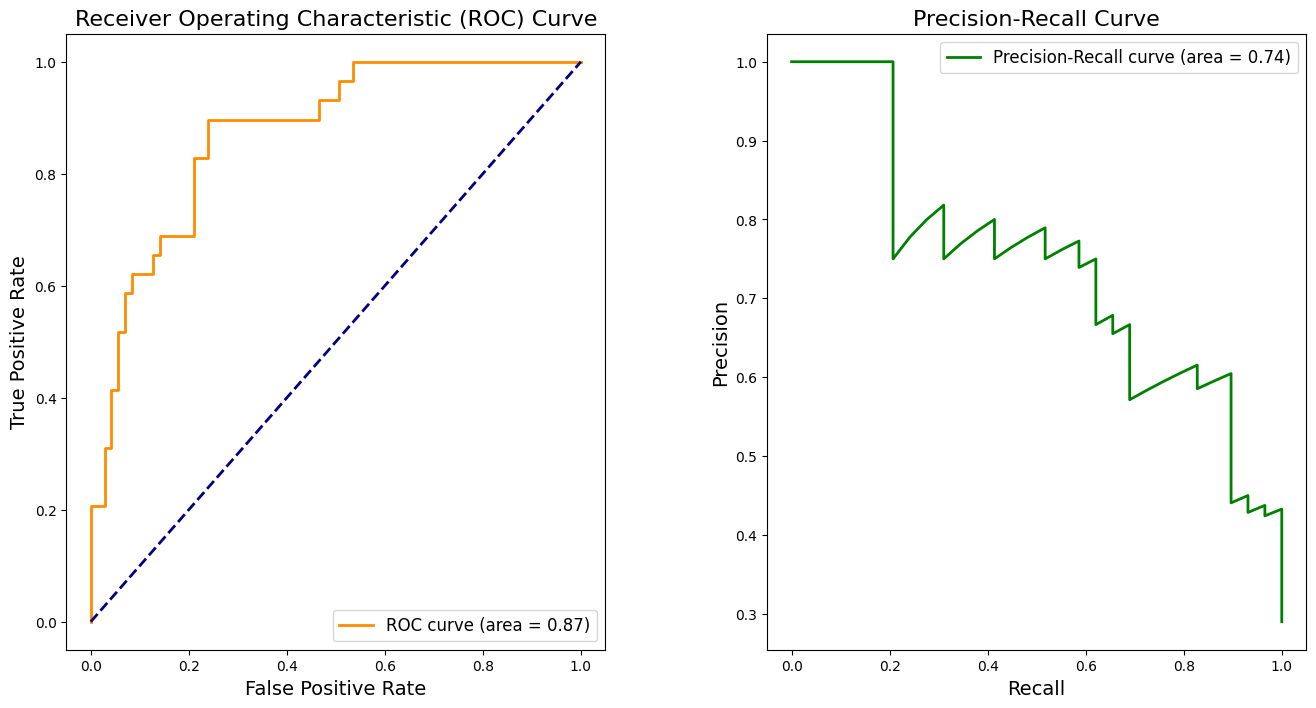

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Compute predicted probabilities
Y_score = grid_search.best_estimator_.predict_proba(X_test_final)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(Y_test, Y_score)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(Y_test, Y_score)
pr_auc = auc(recall, precision)

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plt.subplots_adjust(wspace=0.3)

# Plot ROC curve
ax1.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlabel('False Positive Rate', fontsize=14)
ax1.set_ylabel('True Positive Rate', fontsize=14)
ax1.set_title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
ax1.legend(loc="lower right", fontsize=12)

# Plot Precision-Recall curve
ax2.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
ax2.set_xlabel('Recall', fontsize=14)
ax2.set_ylabel('Precision', fontsize=14)
ax2.set_title('Precision-Recall Curve', fontsize=16)
ax2.legend(loc="upper right", fontsize=12)

# Show plots
plt.show()

As expected hyperparameter tuning has improved the decision tree model